In [56]:
import pandas as pd
listing = pd.read_csv('C:/Users/genhk/Desktop/JDA_Tiffany/JDA/Final_Project/Bangkok/listing_with_occupancy.csv')
review = pd.read_csv('C:/Users/genhk/Desktop/JDA_Tiffany/JDA/Final_Project/Bangkok/eng_review.csv')

In [57]:
review.head()

,Unnamed: 0,listing_id,id,date,reviewer_id,reviewer_name,comments,year,language_encoding,clean_text
0,0,27934,589850938,2020-01-06,81236740,Wenrong,"Roomy than expected, with one bedroom, one liv...",2020,en,Roomy expected one bedroom one living room kic...
1,1,27934,1247551387958002555,2024-09-17,597249865,Kuniaki,"It was Very nice person, nice room!<br/>It was...",2024,en,nice person nice roomIt great
2,2,4786588,602562135383169069,2022-04-11,68315726,Michael,Great value and great location. Excellent comm...,2022,en,Great value great location Excellent communica...
3,3,4786588,675697320378821339,2022-07-21,1773626,Talisa,This place is conveniently located right on th...,2022,en,place conveniently located right main road min...
4,4,4786588,692405339424647600,2022-08-13,40393629,Ricky,Pros:<br/>* Host is very quick in solving prob...,2022,en,Pros Host quick solving problems providing sup...


In [60]:
import pandas as pd
from datetime import datetime

# Assuming your DataFrame is called df and 'host_since' is a column with date strings
listing['host_since'] = pd.to_datetime(listing['host_since'], errors='coerce')  # Convert to datetime
today = pd.Timestamp(datetime.today())

# Calculate the year difference
listing['host_years'] = (today - listing['host_since']).dt.days // 365

new_host = listing[listing['host_years'] <= 5]
old_host = listing[listing['host_years'] > 5]

In [8]:
new_host[new_host['id'] == 1052967552611085089]

,Unnamed: 0,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,...,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,occupancy_rate,host_years
15961,15961,1052967552611085089,https://www.airbnb.com/rooms/1052967552611085089,20250624193503,2025-06-25,previous scrape,Adamus House207TwinBeds MRT few steps! CentralBKK,Adamus House: Your BKK Home<br />Enjoy a comfo...,NaN,https://a0.muscache.com/pictures/hosting/Hosti...,...,4.86,NaN,f,9,0,9,0,1.16,16.44,1.0


In [12]:
review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271772 entries, 0 to 271771
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Unnamed: 0         271772 non-null  int64 
 1   listing_id         271772 non-null  int64 
 2   id                 271772 non-null  int64 
 3   date               271772 non-null  object
 4   reviewer_id        271772 non-null  int64 
 5   reviewer_name      271770 non-null  object
 6   comments           271772 non-null  object
 7   year               271772 non-null  int64 
 8   language_encoding  271772 non-null  object
 9   clean_text         271764 non-null  object
dtypes: int64(5), object(5)
memory usage: 20.7+ MB


In [61]:
new_host_review = review[review['listing_id'].isin(new_host['id'])]
new_host_review = new_host_review[new_host_review['year'] >= 2020]
new_host_review.info()

<class 'pandas.core.frame.DataFrame'>
Index: 59942 entries, 25486 to 271771
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         59942 non-null  int64 
 1   listing_id         59942 non-null  int64 
 2   id                 59942 non-null  int64 
 3   date               59942 non-null  object
 4   reviewer_id        59942 non-null  int64 
 5   reviewer_name      59941 non-null  object
 6   comments           59942 non-null  object
 7   year               59942 non-null  int64 
 8   language_encoding  59942 non-null  object
 9   clean_text         59940 non-null  object
dtypes: int64(5), object(5)
memory usage: 5.0+ MB


In [62]:
import re

def remove_html_tags_regex(text):
    clean = re.compile('<.*?>')
    return re.sub(clean, '', text)

new_host_review['no_html'] = new_host_review['comments'].apply(remove_html_tags_regex)


In [63]:
new_host_review

,Unnamed: 0,listing_id,id,date,reviewer_id,reviewer_name,comments,year,language_encoding,clean_text,no_html
25486,36264,14847917,1402685267491431032,2025-04-19,143685651,Bryan,Pet friendly hotel residence property (we have...,2025,en,Pet friendly hotel residence property three in...,Pet friendly hotel residence property (we have...
36381,52003,20347136,1280158998212211276,2024-11-01,267105113,Jan Jakub,Great apartment close to the nightlife distric...,2024,en,Great apartment close nightlife district Nana ...,Great apartment close to the nightlife distric...
36382,52004,20347136,1306255642298650794,2024-12-07,4567455,Joe,"A great spot on the quiet end of the Soi, very...",2024,en,great spot quiet end Soi convenient longer sta...,"A great spot on the quiet end of the Soi, very..."
36383,52005,20347136,1312774834834448973,2024-12-16,69920669,Martyn,"Great apartment, good facilities, all was good...",2024,en,Great apartment good facilities good Good comm...,"Great apartment, good facilities, all was good..."
36384,52006,20347136,1325893874492229246,2025-01-03,572418461,Arif,everything was perfect.,2025,en,everything perfect,everything was perfect.
...,...,...,...,...,...,...,...,...,...,...,...
271763,408934,1441391554243891083,1446932563205309009,2025-06-19,687895250,Hana,Here’s the English translation:<br/>The house ...,2025,en,Heres English translationThe house easy find f...,Here’s the English translation:The house is ea...
271765,408937,1442779966464091434,1455575829203941367,2025-07-01,423124973,Ron,"We enjoyed our stay here. it is quiet, close t...",2025,en,enjoyed stay quiet close Chinatown everything ...,"We enjoyed our stay here. it is quiet, close t..."
271769,408945,1444062790313784171,1451296915609549448,2025-06-25,585812377,Katie,Great location. Easy for getting around the city.,2025,en,Great location Easy getting around city,Great location. Easy for getting around the city.
271770,408947,1445014333389609399,1448376883865228628,2025-06-21,580895913,Binghua,"The landlord is very nice, the room is big, th...",2025,en,landlord nice room big kitchen cooking equippe...,"The landlord is very nice, the room is big, th..."


# VADER

In [13]:
! pip install vaderSentiment


[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import pandas as pd


analyzer = SentimentIntensityAnalyzer()


def analyze_sentiment(text):
    score = analyzer.polarity_scores(text)
    return score['compound']  


new_host_review['sentiment_score'] = new_host_review['no_html'].apply(analyze_sentiment)

def classify_sentiment(score):
    if score >= 0.05:
        return 'Positive'
    elif score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

new_host_review['sentiment_label'] = new_host_review['sentiment_score'].apply(classify_sentiment)

new_host_review[['year','comments', 'sentiment_score', 'sentiment_label']].head()


,year,comments,sentiment_score,sentiment_label
25486,2025,Pet friendly hotel residence property (we have...,0.9055,Positive
36381,2024,Great apartment close to the nightlife distric...,0.8588,Positive
36382,2024,"A great spot on the quiet end of the Soi, very...",0.6249,Positive
36383,2024,"Great apartment, good facilities, all was good...",0.9492,Positive
36384,2025,everything was perfect.,0.5719,Positive


In [15]:
new_host_review[['year','comments', 'sentiment_score', 'sentiment_label']]

,year,comments,sentiment_score,sentiment_label
25486,2025,Pet friendly hotel residence property (we have...,0.9055,Positive
36381,2024,Great apartment close to the nightlife distric...,0.6588,Positive
36382,2024,"A great spot on the quiet end of the Soi, very...",0.6249,Positive
36383,2024,"Great apartment, good facilities, all was good...",0.9492,Positive
36384,2025,everything was perfect.,0.5719,Positive
...,...,...,...,...
271763,2025,Here’s the English translation:<br/>The house ...,0.9719,Positive
271765,2025,"We enjoyed our stay here. it is quiet, close t...",0.8860,Positive
271769,2025,Great location. Easy for getting around the city.,0.7906,Positive
271770,2025,"The landlord is very nice, the room is big, th...",0.8655,Positive


In [27]:
new_host_review ['sentiment_label'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'

sentiment_label
Positive    95.6%
Negative     2.6%
Neutral      1.8%
Name: proportion, dtype: object

In [24]:
review_again = new_host_review [new_host_review ['sentiment_label'] != 'Positive']  

In [25]:
review_again.head()

,Unnamed: 0,listing_id,id,date,reviewer_id,reviewer_name,comments,year,language_encoding,clean_text,sentiment_score,sentiment_label,no_html
57436,82456,28167967,689514420029708107,2022-08-09,461778875,Ooi,Will stay here again for my next Bangkok trip 👍🏼,2022,en,stay next Bangkok trip,0.0000,Neutral,Will stay here again for my next Bangkok trip 👍🏼
57471,82507,28167967,930174537884572265,2023-07-07,4758556,Anisah,The place is the same as described. Cleanlines...,2023,en,place described Cleanliness rating Walkable di...,0.0000,Neutral,The place is the same as described. Cleanlines...
57484,82522,28167967,1091265196468217681,2024-02-14,94706904,Thomas,Overall place below for reference.<br/>1) Loc...,2024,en,Overall place reference Location outside Bangk...,-0.2439,Negative,Overall place below for reference.1) Location...
57490,82534,28167967,1317870350285520342,2024-12-23,230345178,Luke,Overall stay was okay but 3 problems that stoo...,2024,en,Overall stay okay problems stood electric kett...,-0.7579,Negative,Overall stay was okay but 3 problems that stoo...
63676,91335,27345347,1290335165308718064,2024-11-15,28911059,Louis,"The staff were friendly, but during my stay, t...",2024,en,staff friendly stay construction work multiple...,-0.2928,Negative,"The staff were friendly, but during my stay, t..."


In [29]:
new_host_review.to_csv('C:/Users/genhk/Desktop/JDA_Tiffany/JDA/Final_Project/Bangkok/new_host_review.csv')

In [40]:
negative_review = new_host_review [new_host_review ['sentiment_label'] == 'Negative']  

In [43]:
negative_review.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1185 entries, 57484 to 271645
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         1185 non-null   int64  
 1   listing_id         1185 non-null   int64  
 2   id                 1185 non-null   int64  
 3   date               1185 non-null   object 
 4   reviewer_id        1185 non-null   int64  
 5   reviewer_name      1185 non-null   object 
 6   comments           1185 non-null   object 
 7   year               1185 non-null   int64  
 8   language_encoding  1185 non-null   object 
 9   clean_text         1185 non-null   object 
 10  sentiment_score    1185 non-null   float64
 11  sentiment_label    1185 non-null   object 
 12  no_html            1185 non-null   object 
dtypes: float64(1), int64(5), object(7)
memory usage: 129.6+ KB


# Word Cloud

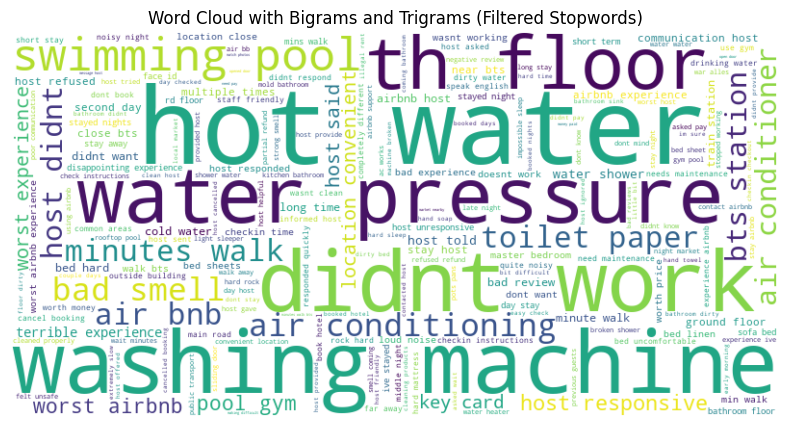

In [ ]:

import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from wordcloud import STOPWORDS


custom_stopwords = set(STOPWORDS)
custom_stopwords.update(['highly', 'recommend', 'nice', 'great', 'good', 'really', 'definitely', 
                         'Thank', 'enjoyed', 'overall', 'recommended', 'come','back', 'place', 'Bangkok', 
                         'Airbnb', 'house', 'apartment', 'cando', 'condo', 'room', 'walking', 'distance', 'bts station' ])



vectorizer = CountVectorizer(ngram_range=(2, 3), stop_words='english')
X = vectorizer.fit_transform(negative_review ['clean_text'].dropna())


ngram_freq = dict(zip(vectorizer.get_feature_names_out(), X.toarray().sum(axis=0)))


filtered_ngram_freq = {
    phrase: freq for phrase, freq in ngram_freq.items()
    if not any(word in custom_stopwords for word in phrase.split())
}


wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white'
).generate_from_frequencies(filtered_ngram_freq)


plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud with Bigrams and Trigrams (Filtered Stopwords)")
plt.show()
